In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Wczytanie danych

In [4]:
df = pd.read_csv('../prepared_data/prepared_dataframe.csv')
df.head()

,Unnamed: 0,Date,Player_1,Player_2,Rank_1,Rank_2,Pts_1,Pts_2,Score,Player1_wins,...,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Greenset,Surface_Hard,Round_encoded,H2H_diff,Player1_last10_diff,Player2_last10_diff
0,0,2006-12-31,Golds S.,Castano C.,0.318933,0.029057,0.001542,0.030920,3-6 4-6,0,...,True,False,False,False,False,True,1,0,0,0
1,1,2006-12-31,Benesova I.,Bremond S.,0.030400,0.021382,0.029598,0.038337,6-0 4-6 2-6,0,...,True,False,False,False,False,True,1,0,0,0
2,2,2006-12-31,Hingis M.,Bammer S.,0.003200,0.026316,0.148281,0.031654,6-0 6-2,1,...,True,False,False,False,False,True,1,0,0,0
3,3,2006-12-31,Camerin M.E.,Vesnina E.,0.026133,0.025219,0.031360,0.032756,3-6 2-6,0,...,True,False,False,False,False,True,1,0,0,0
4,4,2006-12-31,Ferguson S.,Sugiyama A.,0.097600,0.013706,0.010796,0.052659,7-6 6-4,1,...,True,False,False,False,False,True,1,0,0,0


Wybranie cech do trenowania

In [9]:
features = [
    'Rank_diff', 'Points_diff', 'Player1_last10_diff', 'Player2_last10_diff',
    'Rank_1', 'Rank_2', 'Pts_1', 'Pts_2',
    'Round_encoded', 'H2H_diff',
    'Court_Indoor', 'Court_Outdoor',
    'Surface_Carpet', 'Surface_Clay', 'Surface_Grass', 'Surface_Greenset', 'Surface_Hard'
]

X = df[features]
X

,Rank_diff,Points_diff,Player1_last10_diff,Player2_last10_diff,Rank_1,Rank_2,Pts_1,Pts_2,Round_encoded,H2H_diff,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Greenset,Surface_Hard
0,0.352357,0.485059,0,0,0.318933,0.029057,0.001542,0.030920,1,0,False,True,False,False,False,False,True
1,0.497656,0.495908,0,0,0.030400,0.021382,0.029598,0.038337,1,0,False,True,False,False,False,False,True
2,0.514199,0.561810,0,0,0.003200,0.026316,0.148281,0.031654,1,0,False,True,False,False,False,False,True
3,0.501792,0.499768,0,0,0.026133,0.025219,0.031360,0.032756,1,0,False,True,False,False,False,False,True
4,0.459057,0.478496,0,0,0.097600,0.013706,0.010796,0.052659,1,0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42130,0.501241,0.407459,4,8,0.003733,0.001096,0.308020,0.485018,7,-2,False,True,False,True,False,False,False
42131,0.512821,0.635588,6,6,0.002133,0.022478,0.358108,0.101131,7,0,False,True,False,True,False,False,False
42132,0.502068,0.433789,6,8,0.002133,0.001096,0.358108,0.485018,10,-1,False,True,False,True,False,False,False
42133,0.515853,0.517450,-2,-2,0.028800,0.055921,0.081228,0.048986,10,0,False,True,False,False,False,False,True


Do testowania

In [13]:
y = df['Player1_wins']
y

0        0
1        0
2        1
3        0
4        1
        ..
42130    0
42131    1
42132    1
42133    1
42134    0
Name: Player1_wins, Length: 42135, dtype: int64

Skalowanie cech numerycznych

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-4.35782616, -0.18324943, -0.07746867, ..., -0.34639021,
        -0.02624382,  0.80251857],
       [-0.13491306, -0.04853462, -0.07746867, ..., -0.34639021,
        -0.02624382,  0.80251857],
       [ 0.34587401,  0.7698219 , -0.07746867, ..., -0.34639021,
        -0.02624382,  0.80251857],
       ...,
       [-0.00670318, -0.81990875,  1.55487456, ..., -0.34639021,
        -0.02624382, -1.24607709],
       [ 0.39395271,  0.21897735, -0.62158308, ..., -0.34639021,
        -0.02624382,  0.80251857],
       [ 0.02534929,  0.69407478, -1.16569749, ..., -0.34639021,
        -0.02624382,  0.80251857]])

Podział na zbiory train/test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Budowa modelu Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid'),
    
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Krzychu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trenowanie modelu

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

Epoch 1/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6044 - loss: 0.7107 - val_accuracy: 0.6608 - val_loss: 0.6167
Epoch 2/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6409 - loss: 0.6370 - val_accuracy: 0.6651 - val_loss: 0.6129
Epoch 3/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6460 - loss: 0.6304 - val_accuracy: 0.6660 - val_loss: 0.6122
Epoch 4/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6490 - loss: 0.6285 - val_accuracy: 0.6706 - val_loss: 0.6149
Epoch 5/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6536 - loss: 0.6265 - val_accuracy: 0.6660 - val_loss: 0.6122
Epoch 6/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6555 - loss: 0.6227 - val_accuracy: 0.6608 - val_loss: 0.6157
Epoch 7/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6549 - loss: 0.6236 - val_accuracy: 0.6649 - val_loss: 0.6120
Epoch 8/30
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6506 - loss: 0.6240 - val_accuracy: 0.

Ewaluacja

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6473 - loss: 0.6252
Test accuracy: 0.65


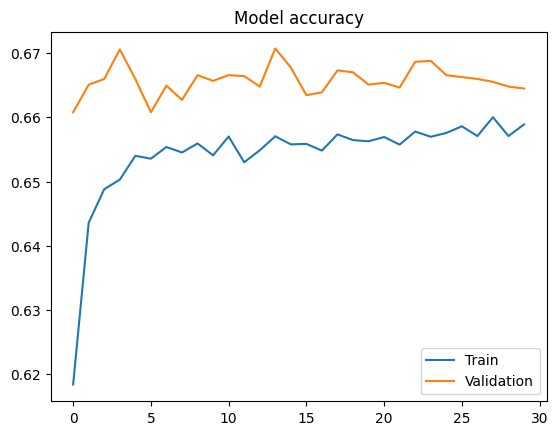

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model accuracy")
plt.legend()
plt.show()
